------------------------------- Important library used in our code -------------------------------

In [1]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from collections import Counter
from imblearn.over_sampling import SMOTE
from tensorflow import keras


------------------------------- Utility Function that are used in our code -------------------------------

In [2]:
# funtion that load the data set into our program
def loadData(data_set = None):

    if (data_set == None):
        return None
    else:
        data = []
        fptr = open(data_set, "r")
        lines = fptr.readlines()
        for line in lines:
            line = line.strip().split()
            for i in range(len(line)):
                line[i] = float(line[i])
            # print(line)
            data.append(line)
        
        return np.array(data)

In [3]:
# function that make the new data set based on statistical value
def makeNewDataSet(data_set=None):

    new_data_set = []

    for i in range(0, len(data_set), 32):
        
        temp = []
        x = data_set[i: i + 32, 0]
        y = data_set[i: i + 32, 1]
        z = data_set[i: i + 32, 2]
        op = data_set[i][3]
        # y = data_set[i][-1]

        # adding mean to data set
        temp.append(np.mean(x))
        temp.append(np.mean(y))
        temp.append(np.mean(z))

        # adding median to the data set
        temp.append(np.median(x))
        temp.append(np.median(y))
        temp.append(np.median(z))

        # adding mode to the data set
        temp.append(stats.mode(x, keepdims=True)[0][0])
        temp.append(stats.mode(y, keepdims=True)[0][0])
        temp.append(stats.mode(z, keepdims=True)[0][0])

        # adding the standard deviation to the data set
        temp.append(np.std(x))
        temp.append(np.std(y))
        temp.append(np.std(z))

        # adding the quantile @25 in the data set
        iq_1 = np.quantile(x, .25)
        iq_2 = np.quantile(y, .25)
        iq_3 = np.quantile(z, .25)
        temp.append(iq_1)
        temp.append(iq_2)
        temp.append(iq_3)

        # adding the quantile @50 in the data set
        temp.append(np.quantile(x, .5))
        temp.append(np.quantile(y, .5))
        temp.append(np.quantile(z, .5))

        # adding the quantile @75 in the data set
        iq_1_ = np.quantile(x, .75)
        iq_2_ = np.quantile(y, .75)
        iq_3_ = np.quantile(z, .75)
        temp.append(iq_1_)
        temp.append(iq_2_)
        temp.append(iq_3_)

        # adding inter quantile in the data set
        temp.append(iq_1_ - iq_1)
        temp.append(iq_2_ - iq_2)
        temp.append(iq_3_ - iq_3)

        # adding the output 
        temp.append(op)

        new_data_set.append(temp)
        # print(temp, op)
    
    return np.array(new_data_set)


In [4]:
# Make new data set based on sliding window
def makeNewDataSet2(data_set=None):

    new_data_set = []

    for i in range(0, len(data_set), 10):
        
        temp = []
        x = data_set[i: i + 32, 0]
        y = data_set[i: i + 32, 1]
        z = data_set[i: i + 32, 2]
        op = data_set[i: i + 32, 3]

        find_most_common = lambda arr: max(Counter(arr).items(), key=lambda x: x[1])[0]
        op = find_most_common(op)
        # y = data_set[i][-1]

        # adding mean to data set
        temp.append(np.mean(x))
        temp.append(np.mean(y))
        temp.append(np.mean(z))

        # adding median to the data set
        temp.append(np.median(x))
        temp.append(np.median(y))
        temp.append(np.median(z))

        # adding mode to the data set
        temp.append(stats.mode(x, keepdims=True)[0][0])
        temp.append(stats.mode(y, keepdims=True)[0][0])
        temp.append(stats.mode(z, keepdims=True)[0][0])

        # adding the standard deviation to the data set
        temp.append(np.std(x))
        temp.append(np.std(y))
        temp.append(np.std(z))

        # adding the quantile @25 in the data set
        iq_1 = np.quantile(x, .25)
        iq_2 = np.quantile(y, .25)
        iq_3 = np.quantile(z, .25)
        temp.append(iq_1)
        temp.append(iq_2)
        temp.append(iq_3)

        # adding the quantile @50 in the data set
        temp.append(np.quantile(x, .5))
        temp.append(np.quantile(y, .5))
        temp.append(np.quantile(z, .5))

        # adding the quantile @75 in the data set
        iq_1_ = np.quantile(x, .75)
        iq_2_ = np.quantile(y, .75)
        iq_3_ = np.quantile(z, .75)
        temp.append(iq_1_)
        temp.append(iq_2_)
        temp.append(iq_3_)

        # adding inter quantile in the data set
        temp.append(iq_1_ - iq_1)
        temp.append(iq_2_ - iq_2)
        temp.append(iq_3_ - iq_3)

        # adding the output 
        temp.append(op)

        new_data_set.append(temp)
        # print(temp, op)
    
    return np.array(new_data_set)

In [5]:
# Finding number of left, right turn in the data
def countTurns(data):
    count_l = 0
    count_r = 0
    no_turn = 0

    for i in range(0, len(data)):

        if data[i][-1] == -1:
            count_l += 1
        
        elif data[i][-1] == 1:
            count_r += 1
        
        else:
            no_turn += 1
    
    return {count_l, count_r, no_turn}

In [6]:
# function that run the model at that size
def runModelAtSize(split_ratio, model_name, X, y):
    
    output = [round(split_ratio, 1), model_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(split_ratio, 1), random_state=42)

    if model_name == "Descison tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Random Forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "KNN":
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)

    elif model_name == "AdaBoost":
        model = AdaBoostClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Gaussian NB":
        model = GaussianNB()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "SVM":
        model = SVC()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Gradient Boosting":
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "MLP":
        model = MLPClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    
    return output

In [7]:
# finction that run all the models at differnt size
def runAllModels(data_set, file_name):
    X = data_set[:, 3:-1]
    y = data_set[:, -1]

    # smote = SMOTE(sampling_strategy='auto', random_state=42)
    # X, y = smote.fit_resample(X, y)

    outputs = [["Split ratio", "Model", "Train Accuracy", "Test Accuracy"]]
    
    # Run model 1: Descision tree
    split_ratio = 0.2
    for i in range(5):
        outputs.append(runModelAtSize(split_ratio, "Descison tree", X, y))
        outputs.append(runModelAtSize(split_ratio, "Random Forest", X, y))
        outputs.append(runModelAtSize(split_ratio, "KNN", X, y))
        outputs.append(runModelAtSize(split_ratio, "AdaBoost", X, y))
        outputs.append(runModelAtSize(split_ratio, "Gaussian NB", X, y))
        outputs.append(runModelAtSize(split_ratio, "SVM", X, y))
        outputs.append(runModelAtSize(split_ratio, "Gradient Boosting", X, y))
        outputs.append(runModelAtSize(split_ratio, "MLP", X, y))


        outputs.append(["-------------"] * len(outputs[0]))
        split_ratio += 0.1

    out = tabulate(outputs, headers="firstrow")
    fptr = open(file_name, "w")
    fptr.write(out)
    fptr.close()


In [8]:
# function that run the model at that size
def runModelAtSizeNew(split_ratio, model_name, X, y):
    
    output = [model_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(split_ratio, 1), random_state=42)

    if model_name == "Descison tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Random Forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "KNN":
        model = KNeighborsClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)

    elif model_name == "AdaBoost":
        model = AdaBoostClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Gaussian NB":
        model = GaussianNB()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "SVM":
        model = SVC()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "Gradient Boosting":
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    elif model_name == "MLP":
        model = MLPClassifier()
        model.fit(X_train, y_train)

        # Train Accuracy
        y_pred = model.predict(X_train)
        output.append(accuracy_score(y_pred, y_train)*100)

        # Test Accuracy
        y_pred = model.predict(X_test)
        output.append(accuracy_score(y_pred, y_test)*100)
    
    
    return output

In [9]:
def runModels(data_set):
    
    X = data_set[:, 3:-1]
    y = data_set[:, -1]

    outputs = []

    # Run model 1: Descision tree
    split_ratio = 0.3
    outputs.append(runModelAtSizeNew(split_ratio, "Descison tree", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "Random Forest", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "KNN", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "AdaBoost", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "Gaussian NB", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "SVM", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "Gradient Boosting", X, y))
    outputs.append(runModelAtSizeNew(split_ratio, "MLP", X, y))

    return outputs

In [10]:
# function that find Individual Accuracy for new left, right, no turn on split ration 0.2
def individualAccuracyNew(data_set, file_name):
    
    X = data_set[:, :-1]
    y = data_set[:, -1]

    X_left = []
    X_right = []
    X_no = []

    y_left = []
    y_right = []
    y_no = []

    for i in range(len(X)):
         
        if (y[i] == 0):
            X_no.append(X[i])
            y_no.append(0)
        
        elif (y[i] == 1):
            X_right.append(X[i])
            y_right.append(1)
        
        else:
            X_left.append(X[i])
            y_left.append(-1)

    X_left_train, X_left_test, y_left_train, y_left_test =  train_test_split(X_left, y_left, test_size=0.2, random_state=42)
    X_right_train, X_right_test, y_right_train, y_right_test =  train_test_split(X_right, y_right, test_size=0.2, random_state=42)
    X_no_train, X_no_test, y_no_train, y_no_test =  train_test_split(X_no, y_no, test_size=0.2, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    outputs = [["Model", "Left Train Accuracy", "Right Train Accuracy", "No Turn Accuracy", "Left Test Accuracy", "Right Test Accuracy", "No Test Accuracy"]]

    #--------------------------------------------------------------------------
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    output = ["Descison tree"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)
   
    #--------------------------------------------------------------------------

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    output = ["Random Forest"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    output = ["KNN"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------
    
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)

    output = ["AdaBoost"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------

    model = GaussianNB()
    model.fit(X_train, y_train)

    output = ["Gaussian NB"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------

    model = SVC()
    model.fit(X_train, y_train)

    output = ["SVM"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------

    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    output = ["Gradient Boosting"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    #--------------------------------------------------------------------------

    model = MLPClassifier()
    model.fit(X_train, y_train)

    output = ["MLP"]
    
    y_pred = model.predict(X_left_train)
    output.append(accuracy_score(y_pred, y_left_train)*100)
    y_pred = model.predict(X_right_train)
    output.append(accuracy_score(y_pred, y_right_train)*100)
    y_pred = model.predict(X_no_train)
    output.append(accuracy_score(y_pred, y_no_train)*100)

    y_pred = model.predict(X_left_test)
    output.append(accuracy_score(y_pred, y_left_test)*100)
    y_pred = model.predict(X_right_test)
    output.append(accuracy_score(y_pred, y_right_test)*100)
    y_pred = model.predict(X_no_test)
    output.append(accuracy_score(y_pred, y_no_test)*100)

    outputs.append(output)

    fptr = open(file_name, "w")
    op = tabulate(outputs, headers="firstrow")

    fptr.write(op)

    fptr.write("\nFor training data")
    fptr.write(f"\nleft: {len(X_left_train)} right: {len(X_right_train)} no_turn: {len(X_no_train)}")
    fptr.write("\nFor testing data")
    fptr.write(f"\nleft: {len(X_left_test)} right: {len(X_right_test)} no_turn: {len(X_no_test)}")

    fptr.close()

In [8]:
# function that train on one data set and test on other data set
def runAllDataSet(file_name, test_data_set, *train_data_sets):

    training_data_set = train_data_sets[0]

    for i in range(1, len(train_data_sets)):
        training_data_set = np.concatenate((training_data_set, train_data_sets[i]))
    
    # training_data_set = np.array(training_data_set)
    
    fptr = open(file_name, "w")

    X_train = training_data_set[:, :-1]
    y_train = training_data_set[:, -1]

    X_test = test_data_set[:, :-1]
    y_test = test_data_set[:, -1]

    # smote = SMOTE(sampling_strategy='auto', random_state=42)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    # X_test, y_test = smote.fit_resample(X_test, y_test)


    outputs = [["Model_name" , "training", "testing"]]

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    output = ["Descison tree"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    output = ["Random Forest"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    output = ["KNN"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    output = ["AdaBoost"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = GaussianNB()
    model.fit(X_train, y_train)
    output = ["Gaussian NB"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = SVC()
    model.fit(X_train, y_train)
    output = ["SVM"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    output = ["Gradient Boosting"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    model = MLPClassifier()
    model.fit(X_train, y_train)
    output = ["MLP"]
    y_pred = model.predict(X_train)
    output.append(accuracy_score(y_pred, y_train)*100)
    y_pred = model.predict(X_test)
    output.append(accuracy_score(y_pred, y_test)*100)
    outputs.append(output)

    tab = tabulate(outputs, headers="firstrow")

    fptr.write(tab)

    fptr.close()


    return outputs

------------------------------- variables that are used in our code -------------------------------

In [17]:

data_set_1 = loadData("3_19/visual_freq.txt")
data_set_2 = loadData("4_57/visual_freq.txt")
data_set_3 = loadData("5_11/visual_freq.txt")
data_set_4 = loadData("Australia/visual_freq.txt")

In [20]:
runAllModels(data_set_1, "Output/driver_1_freq_only.txt")
runAllModels(data_set_2, "Output/driver_2_freq_only.txt")
runAllModels(data_set_3, "Output/driver_3_freq_only.txt")
runAllModels(data_set_4, "Output/driver_4_freq_only.txt")
# runAllModels(new_data_set_4, "Output/driver_4_freq.txt")

c:\Users\Yaman Sahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Yaman Sahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
individualAccuracyNew(data_set_1, "Output/int_ind_1.txt")
individualAccuracyNew(data_set_2, "Output/int_ind_2.txt")

In [20]:
new_data_set_1 = makeNewDataSet2(loadData('3_19/visual_annotion_3_19.txt'))
new_data_set_2 = makeNewDataSet2(loadData("4_57/visual_annotation_4_57.txt"))
new_data_set_3 = makeNewDataSet2(loadData("5_11/visual_annotion_5_11.txt"))
new_data_set_4 = makeNewDataSet2(loadData("Australia/visual_annotation_aus.txt"))

In [24]:
op_driver_1_old = runModels(new_data_set_1)
op_driver_2_old = runModels(new_data_set_2)
op_driver_3_old = runModels(new_data_set_3)
op_driver_4_old = runModels(new_data_set_4)

In [9]:
# variable that stores the data
data_set_1 = loadData("5_11/visual_annotion_5_11.txt")
new_data_set_1 = makeNewDataSet2(data_set = data_set_1)
new_data_set_2 = makeNewDataSet2(loadData('3_19/visual_annotion_3_19.txt'))
new_data_set_3 = makeNewDataSet2(loadData("4_57/visual_annotation_4_57.txt"))
new_data_set_4 = makeNewDataSet2(loadData("Australia/visual_annotation_aus.txt"))

In [ ]:
runAllModels(new_data_set_1, "Output/driver_1_freq.txt")
runAllModels(new_data_set_2, "Output/driver_2_freq.txt")
runAllModels(new_data_set_3, "Output/driver_3_freq.txt")
runAllModels(new_data_set_4, "Output/driver_4_freq.txt")

In [16]:
individualAccuracyNew(new_data_set_1, "Output/indiv_1.txt")
individualAccuracyNew(new_data_set_2, "Output/indiv_2.txt")
individualAccuracyNew(new_data_set_3, "Output/indiv_3.txt")
individualAccuracyNew(new_data_set_4, "Output/indiv_4.txt")

In [18]:
# let check the number of turns in the data set and total number of rows
print(countTurns(new_data_set_1))
print(len(new_data_set_2))

{481, 315, 1438}
2698


In [13]:
runAllDataSet("Output/test_aus_smote.txt", new_data_set_4, new_data_set_1, new_data_set_2, new_data_set_3)

In [14]:
runAllDataSet("Output/test_1_smote.txt", new_data_set_1, new_data_set_4, new_data_set_2, new_data_set_3)

In [15]:
runAllDataSet("Output/test_2_smote.txt", new_data_set_2, new_data_set_4, new_data_set_1, new_data_set_3)

In [16]:
runAllDataSet("Output/test_3_smote.txt", new_data_set_3, new_data_set_4, new_data_set_2, new_data_set_1)

In [10]:
data_set_1 = loadData("3_19/visual_freq.txt")
data_set_2 = loadData("4_57/visual_freq.txt")
data_set_3 = loadData("5_11/visual_freq.txt")
data_set_4 = loadData("Australia/visual_freq.txt")

In [16]:
op_driver_1_with_freq = runModels(data_set_1)
op_driver_2_with_freq = runModels(data_set_2)
op_driver_3_with_freq = runModels(data_set_3)
op_driver_4_with_freq = runModels(data_set_4)

In [18]:
op_driver_1_without_freq = runModels(data_set_1)
op_driver_2_without_freq = runModels(data_set_2)
op_driver_3_without_freq = runModels(data_set_3)
op_driver_4_without_freq = runModels(data_set_4)

In [22]:
data_set_1 = loadData("3_19/visual_freq_psd.txt")
data_set_2 = loadData("4_57/visual_freq_psd.txt")
data_set_3 = loadData("5_11/visual_freq_psd.txt")
data_set_4 = loadData("Australia/visual_freq_psd.txt")

In [25]:
op_driver_1_with_freq_psd = runModels(data_set_1)
op_driver_2_with_freq_psd = runModels(data_set_2)
op_driver_3_with_freq_psd = runModels(data_set_3)
op_driver_4_with_freq_psd = runModels(data_set_4)

In [27]:
op_driver_1_without_freq_psd = runModels(data_set_1)
op_driver_2_without_freq_psd = runModels(data_set_2)
op_driver_3_without_freq_psd = runModels(data_set_3)
op_driver_4_without_freq_psd = runModels(data_set_4)

In [28]:
print(op_driver_1_without_freq_psd)

[['Descison tree', 100.0, 100.0], ['Random Forest', 100.0, 100.0], ['KNN', 100.0, 100.0], ['AdaBoost', 62.75485886776465, 63.1409860373162], ['Gaussian NB', 60.631255626754225, 59.594711479055974], ['SVM', 68.21479637769421, 67.40392932163599], ['Gradient Boosting', 81.9679076417942, 80.78586432719635], ['MLP', 66.69491076629774, 66.60076609415543]]


In [41]:
import matplotlib.pyplot as plt
import numpy as np

def make_plots(op_old, op_with_freq, op_without_freq, op_with_freq_psd, op_without_freq_psd):


    # Sample data for five datasets
    data_sets = [
        op_driver_1_old,
        op_driver_1_with_freq,
        op_driver_1_without_freq,
        op_driver_1_with_freq_psd,
        op_driver_1_without_freq_psd
        ]

    # Extracting model names
    model_names = [data[0] for data in data_sets[0]]
    # Calculate number of rows and columns for subplots
    num_rows = 4
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 10))  # Reduced height and width

    # Flatten axes to simplify indexing
    axes = axes.flatten()

    bar_width = 0.3  # Set the bar width

    for i, model_name in enumerate(model_names):
        # Extracting accuracies for the current model
        model_data = [data_set[model_names.index(model_name)][1:] for data_set in data_sets]

        # Plotting
        axes[i].bar(np.arange(len(data_sets)), [x[0] for x in model_data], width=bar_width, label='Train Accuracy')
        axes[i].bar(np.arange(len(data_sets)) + bar_width, [x[1] for x in model_data], width=bar_width, label='Test Accuracy')

        axes[i].set_title(f'Accuracy Comparison for {model_name}')
        axes[i].set_xlabel('Dataset')
        axes[i].set_ylabel('Accuracy')
        axes[i].set_xticks(np.arange(len(data_sets)) + bar_width / 2)
        axes[i].set_xticklabels([f'Data {j+1}' for j in range(len(data_sets))])
        # axes[i].legend()

    plt.tight_layout()
    plt.show()



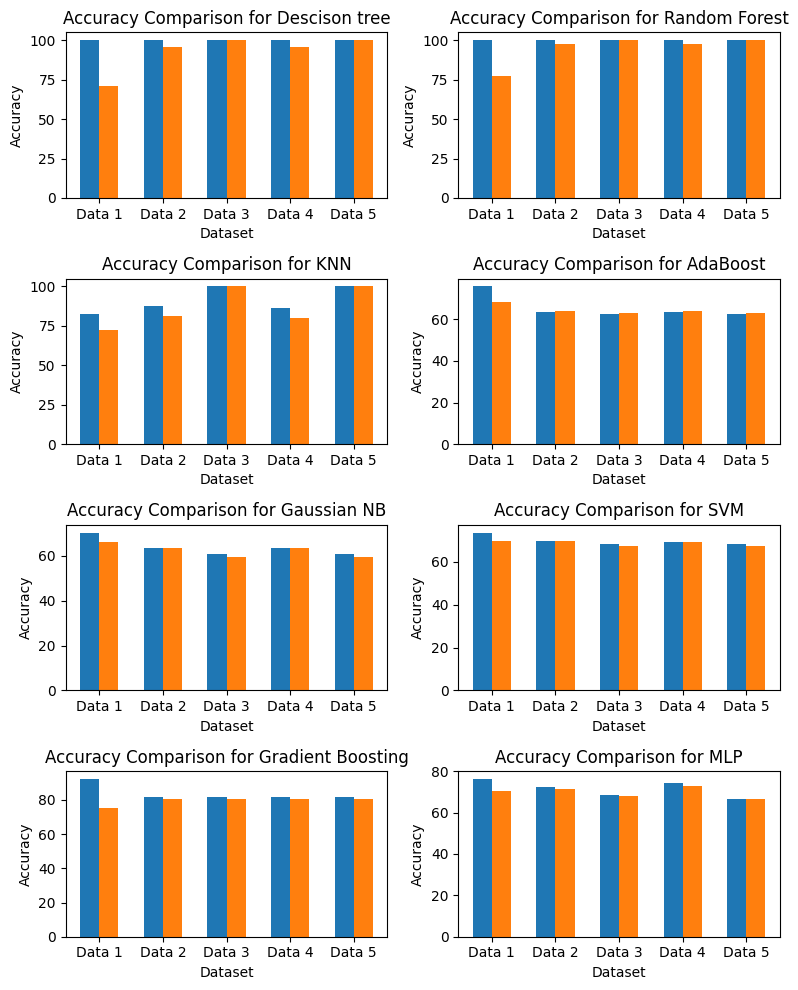

In [42]:
make_plots(op_driver_1_old, op_driver_1_with_freq, op_driver_1_without_freq, op_driver_1_with_freq_psd, op_driver_1_without_freq_psd)

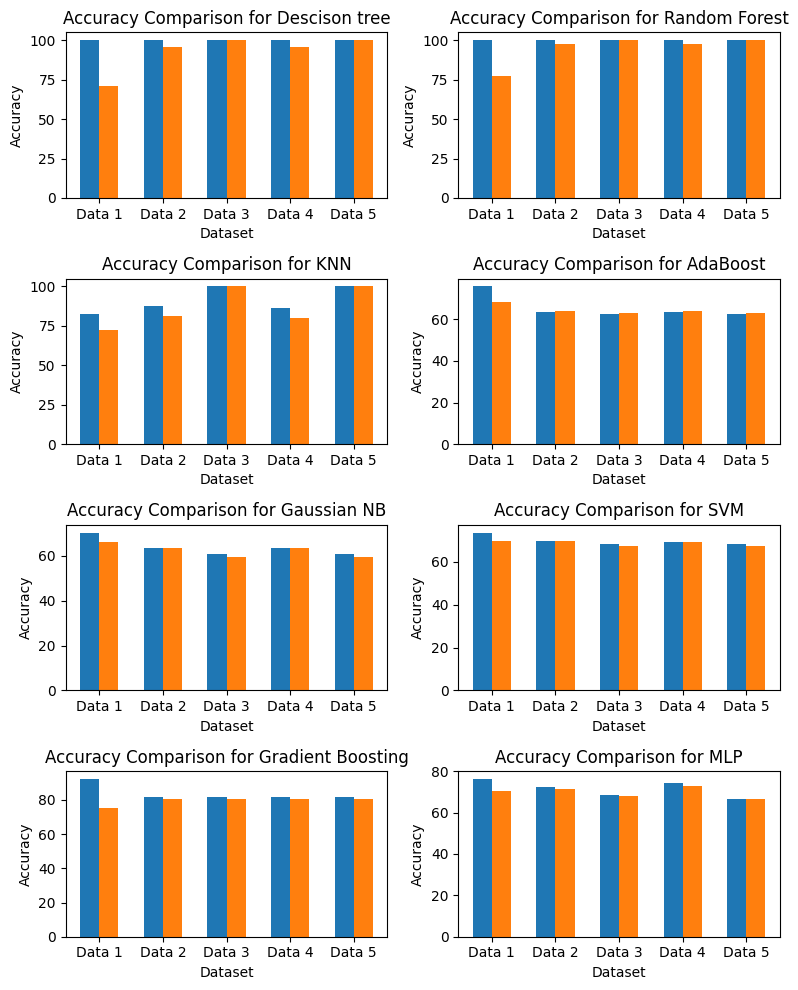

In [43]:
make_plots(op_driver_2_old, 
           op_driver_2_with_freq, 
           op_driver_2_without_freq, 
           op_driver_2_with_freq_psd, 
           op_driver_2_without_freq_psd)

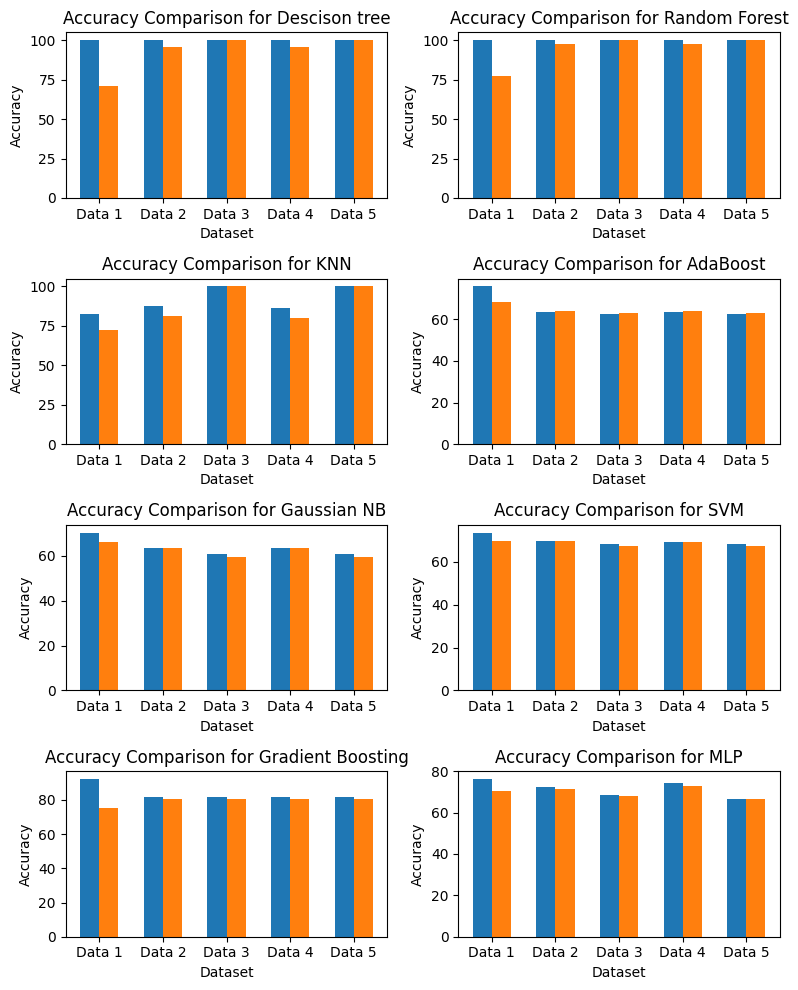

In [44]:
make_plots(op_driver_3_old, 
           op_driver_3_with_freq, 
           op_driver_3_without_freq, 
           op_driver_3_with_freq_psd, 
           op_driver_3_without_freq_psd)

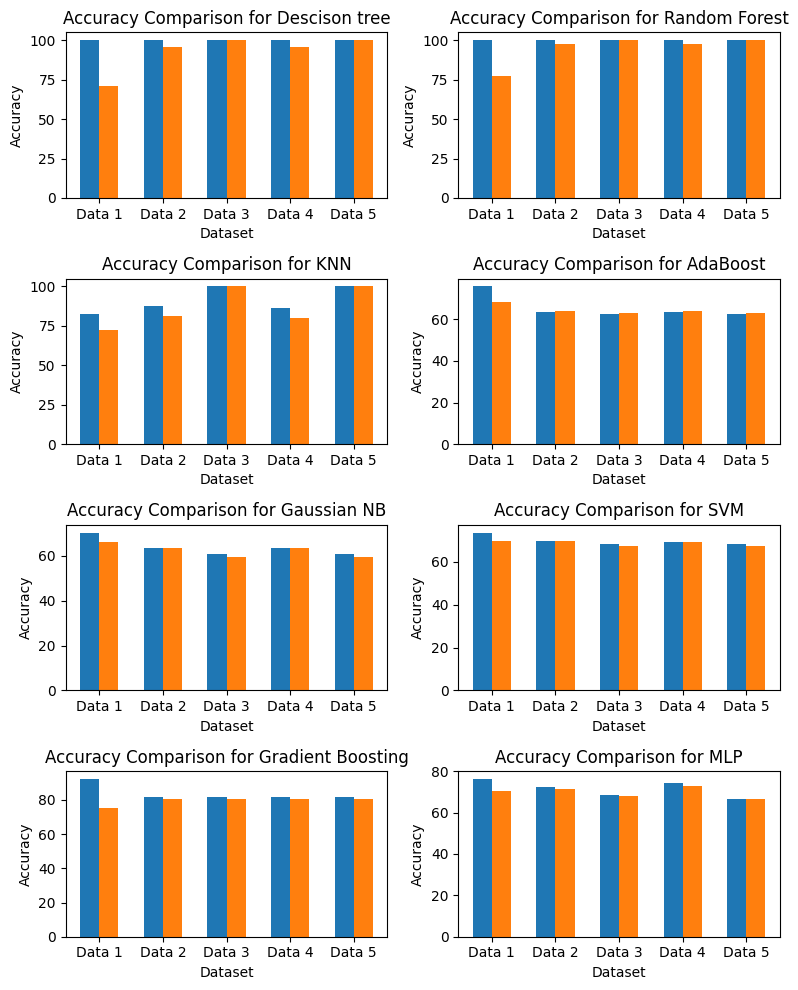

In [45]:
make_plots(op_driver_4_old, 
           op_driver_4_with_freq, 
           op_driver_4_without_freq, 
           op_driver_4_with_freq_psd, 
           op_driver_4_without_freq_psd)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for five datasets
data_sets = [
    op_driver_1_old,
    op_driver_1_with_freq,
    op_driver_1_without_freq,
    op_driver_1_with_freq_psd,
    op_driver_1_without_freq_psd
    ]

# Extracting model names
model_names = [data[0] for data in data_sets[0]]
# data_sets = ["Only Acc", "With freq", "without

# Create separate plots for each model
for model_name in model_names:
    plt.figure(figsize=(6, 4))  # Smaller figure size

    # Extracting accuracies for the current model
    model_data = [data_set[model_names.index(model_name)][1:] for data_set in data_sets]

    # Plotting
    plt.bar(np.arange(len(data_sets)), [x[0] for x in model_data], width=0.3)  # Reduced bar width
    plt.bar(np.arange(len(data_sets)) + 0.3, [x[1] for x in model_data], width=0.3)  # Adjusted bar position and width

    plt.title(f'Accuracy Comparison for {model_name}')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(len(data_sets)) + 0.3 / 2, [f'Data {i+1}' for i in range(len(data_sets))])
    # plt.legend()
    plt.tight_layout()

    plt.show()



In [32]:
model_names

['Descison tree',
 'Random Forest',
 'KNN',
 'AdaBoost',
 'Gaussian NB',
 'SVM',
 'Gradient Boosting',
 'MLP']